<a href="https://colab.research.google.com/github/intb78/partial-cameltools/blob/main/Presentation_of_CAMeL_Tools_Guided_Tour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

This notebook provides a quick overview of the functionalities provided by [CAMeL Tools](https://github.com/CAMeL-Lab/camel_tools). While it doesn't cover every component in detail, it does provide a starting point for learning CAMeL Tools and navigating its APIs. For more detailed information please refer to the [CAMeL Tools documentation](https://camel-tools.readthedocs.io/en/latest/index.html).

# Arabic NLP Refresher

Before diving into CAMeL Tools, we recommend a quick refresher on Arabic NLP and the challenges it presents. [This webinar](https://wti.kaust.edu.sa/upcoming-events/Machine-Learning-Arabic-NLP-Webinar/ml-webinar-2020-keynote-1) presented by Dr. Nizar Habash provides a short introduction on Arabic NLP as well as short examples of how CAMeL Tools can be used to solve various problems. A similar presentation of this webinar in Arabic is also available [here](https://www.youtube.com/watch?v=JQrmRvtx_VY).

*Note: The examples in this talk may not be compatible with current or newer versions of CAMeL Tools.*


# Installation and Setup

The following steps are needed if you want to run the examples in this notebook on Google Colaboratory. If you want to run this notebook on your own machine, please follow the [installation instructions](https://camel-tools.readthedocs.io/en/latest/getting_started.html#installation) instead.

First, we install the CAMeL Tools Python package.

In [1]:
%pip install camel-tools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.3/124.3 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.5/397.5 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.6/426.6 kB 7.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for camel-kenlm: filename=camel_kenlm-2023.3.17.2-cp310-cp310-linux_x86_64.whl size=3453125 sha256=f5353ea9507fa3e7e336c4ec5ec1cba655a70cfbb813cfcb9e020a1359fab15c
  Stored in directory: /root/.cache/pip/wheels/29/c5/32/09633c3b70fdfc470b2fb912bd9e90d8d6814df68c794dcaa6
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=360e0683ade8814080196662316fd3b3521448

In order to use all the components provided in CAMeL Tools, we need to install all the datasets required by these components.
To do this in Colab, we need to first mount a Google Drive and create a directory where the data will be installed.

Run the code below and follow the instructions in the output.

In [2]:
from google.colab import drive
import os

drive.mount('/gdrive')

%mkdir /gdrive/MyDrive/camel_tools

Mounted at /gdrive
mkdir: cannot create directory ‘/gdrive/MyDrive/camel_tools’: File exists


Next, we need to tell CAMeL Tools to install the data in the newly created directory. This will take a couple of minutes to complete.

**NOTE:** You will need at least 2.3GB of available space on your Google Drive to install all the CAMeL Tools data.

In [ ]:
os.environ['CAMELTOOLS_DATA'] = '/gdrive/MyDrive/camel_tools'

!export | camel_data -i all

We also provide a lightweight dataset for the Morphology and Disambiguation components **only** that can be installed by calling `camel_data -i light` instead of `camel_data -i all`.


**Once the data has been installed on your Google Drive, you only need to run the following the next time you want to run this notebook.**

# Preprocessing

In [3]:
%pip install camel-tools

from google.colab import drive
import os

drive.mount('/gdrive')
os.environ['CAMELTOOLS_DATA'] = '/gdrive/MyDrive/camel_tools'

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [4]:
pip install afinn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 564.9 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53429 sha256=864e99c7acba30c150318cf59862c22ff8c3aad04612406728b71d098a6375e5
  Stored in directory: /root/.cache/pip/wheels/b0/05/90/43f79196199a138fb486902fceca30a2d1b5228e6d2db8eb90
Successfully built afinn


In [5]:
pip install ar-wordcloud

In [6]:
# utilities
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# text processing & sentiment analysis
import re
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud # corrected
from afinn import Afinn
import unicodedata as ud
import camel_tools as ct
from nltk.stem.isri import ISRIStemmer

# Correct the import statement based on the library you are using
# For example, if you are using the 'ar_wordcloud' library:
# Correct the import statement based on the library you are using
# If you are using the 'ar_wordcloud' library:
from ar_wordcloud import ArabicWordCloud

# rest of the imports...


import time

# model
from textblob import TextBlob
from camel_tools.sentiment import SentimentAnalyzer
from sklearn.metrics import classification_report, accuracy_score


In [7]:
!pip install chardet


In [9]:
from google.colab import files
import pandas as pd

# Upload the CSV file
uploaded = files.upload()

# Get the first uploaded file
file_name = list(uploaded.keys())[0]

# Read the CSV file into a DataFrame with specified encoding
df = pd.read_csv(file_name, encoding='utf-8')

# Check if 'status_code' column exists before dropping it
if 'status_code' in df.columns:
    # Drop the 'status_code' column
    df = df.drop('status_code', axis=1)

# Display a sample of 5 rows
df.sample(5)









Saving Dataset.csv to Dataset.csv


,id,posItd,comment,score,topic,en
2,57732,880e1146041011eb96ac646e69d991ea,"مبروك عليك اختي المغربية: "" نجاحك دليل على انك",18,morocains- du- monde,"Congratulations to you my Moroccan sister. ""You"
4,8746,208db2de055211eb89a4646e69d991ea,السلام عليكم المعرض الوطني معلمة وطنية وتراثية,3,art-et-culture,Peace be upon you. The international enchibitio
0,14863,b66beeb4055e11eb9691646e69d991ea,لاصحاب الذاكرة الضعيفة اذكركم بما كتبت انا,2,sport,"For those with a weak memory, I will remind you"
1,46001,a117556c04ee11ebacc6646e69d991ea,السلام عليكم المرجو من الاخوان العالقين,0,morocains- du- monde,"Peace be upon you, I ask the brothers stuck in"
3,35630,310fa0e404fb11ebb616646e69d99100,اللهم اغفر لها وارحما واجعل قبرها روضة من رياض...,33,faits-divers,"Oh God, have mercy on her, forgive her, and ma.."


In [10]:
text_ar=list(df['comment'])
text_en=list(df['en'])
#text_ar, text_en = list(df['comment']), list(df['en'])


In [11]:
def preprocess_en(textdata):
    processedText = []

    # Create stopwords list.
    stopwordlist = set(stopwords.words('english'))
    print(stopwordlist)

    # Create Lemmatizer and Stemmer.
    wordLemm = WordNetLemmatizer()

    # Defining regex pattern
    # I believe matching 0-9 is not the correct behaviour
    # also the pattern A-Z should not be included in the match Expression, as
    # he is changing all words to lower case before applying the Regex
    # alphaPattern ="[^a-z]"
    alphaPattern = "[^a-zA-Z0-9]"

    for comment in textdata:
        comment = comment.lower()

        # Replace all non-alphabets.
        comment = re.sub(alphaPattern, " ", comment)

        commentwords = ''
        for word in comment.split():
            # Checking if the word is a stopword.
            if word not in stopwordlist:
                if len(word) > 1:
                    # Lemmatizing the word.
                    word = wordLemm.lemmatize(word)
                    commentwords += (word + ' ')

        processedText.append(commentwords)

    return processedText


In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import time

# Download 'stopwords' and 'wordnet' resources
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_en(textdata):
    processedText = []

    # Create stopwords list.
    stopwordlist = set(stopwords.words('english'))

    # Create Lemmatizer and Stemmer.
    wordLemm = WordNetLemmatizer()

    # Defining regex pattern
    alphaPattern = "[^a-zA-Z0-9]"

    for comment in textdata:
        comment = comment.lower()

        # Replace all non-alphabets.
        comment = re.sub(alphaPattern, " ", comment)

        commentwords = ''
        for word in comment.split():
            # Checking if the word is a stopword.
            if word not in stopwordlist:
                if len(word) > 1:
                    # Lemmatizing the word.
                    word = wordLemm.lemmatize(word)
                    commentwords += (word + ' ')

        #we remove the preceeding and trailing whitespace from the string
        commentwords=commentwords.strip()
        processedText.append(commentwords)

    return processedText

# Assuming text_en is a list of English comments
t = time.time()
print(text_en)
processedtext_en = preprocess_en(text_en)
print(processedtext_en)
print(f'Text Preprocessing complete.')
print(f'Time Taken: {round(time.time()-t)} seconds')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['For those with a weak memory, I will remind you', 'Peace be upon you, I ask the brothers stuck in', 'Congratulations to you my Moroccan sister. "You', 'Oh God, have mercy on her, forgive her, and ma..', 'Peace be upon you. The international enchibitio']
['weak memory remind', 'peace upon ask brother stuck', 'congratulation moroccan sister', 'oh god mercy forgive', 'peace upon international enchibitio']
Text Preprocessing complete.
Time Taken: 2 seconds


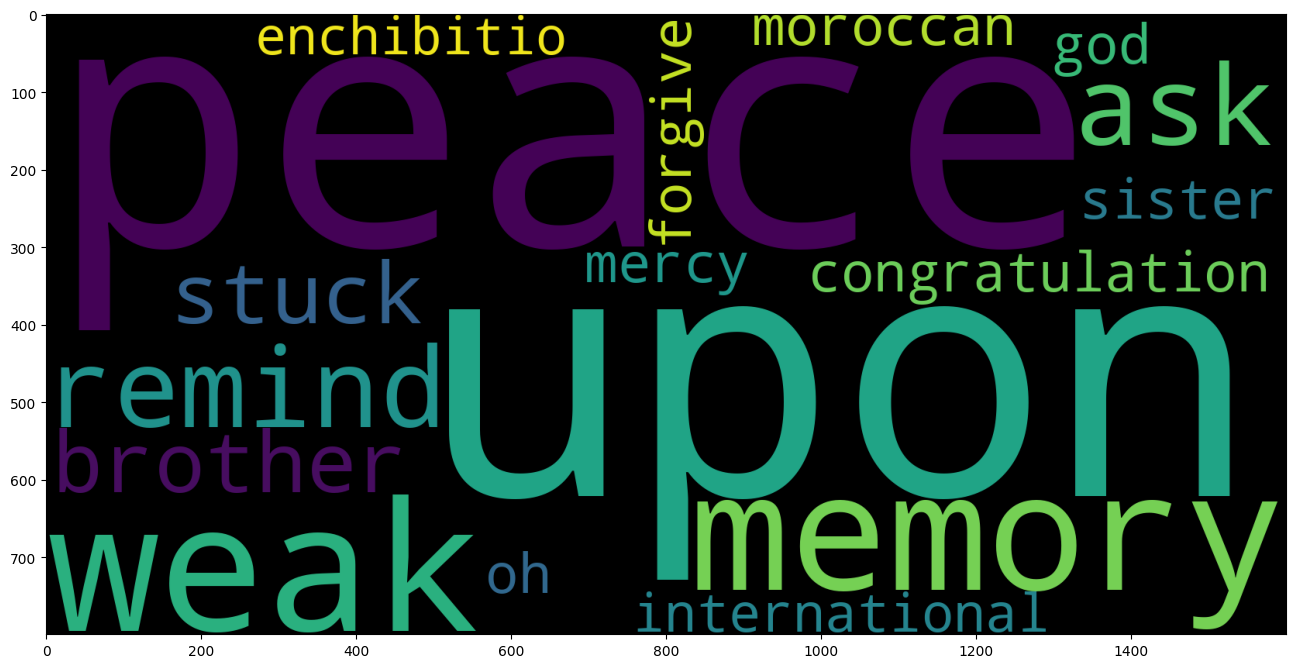

In [13]:
plt.figure(figsize = (16,16))
wc_en = WordCloud(max_words = 1000 , width = 1600 , height = 800,collocations=False).generate(" ".join(processedtext_en))
plt.imshow(wc_en)

In [14]:
pip install textBlob

In [15]:
import time
from textblob import TextBlob  # Import TextBlob if not already imported
t = time.time()
#sentiment_scores_tb = [round(TextBlob(comment).sentiment.polarity, 3) for comment in processedtext_en]
sentiment_scores_tb = [round(TextBlob(comment).sentiment.polarity, 3) for comment in processedtext_en]
print(f'Sentiment prediction complete.')
print(f'Time Taken: {round(time.time() - t)} seconds')
sentiment_category_tb = ['positive' if score > 0
                         else 'negative' if score < 0
                         else 'neutral'
                         for score in sentiment_scores_tb]
df['sentiment'] = sentiment_category_tb


Sentiment prediction complete.
Time Taken: 0 seconds


CAMeL Tools provides a suite of preprocessing utilities for cleaning and preparing Arabic text. Some of these may need to be used before passing text to other CAMeL Tools components.

`CharMapper` is a very flexible component that can be used for many other types of text transformations and can be initialized with any character-to-string mapping.

# **1# Unicode Normalization تطبيع الكود**

Text in Python 3 is represented as a series of [Unicode](https://unicode.org/standard/standard.html) characters. Some characters have different variants, for example the character 'ع' can also be represented as 'ﻊ', 'ﻋ', 'ﻌ' depending on where it appears in a word. For all these forms, we would call 'ع' their canonical form. Furthermore, some Unicode characters are a composition of multiple characters and in some cases can comprise entire phrases. For example, the character 'ﰷ' is a single Unicode character that represents the composition of 'ك' and 'ا'. Unicode decomposition is the process of splitting these composed characters into their individual constituents.

These variants and composed forms are generally used for display purposes and are problematic in text processing tasks. To convert Unicode text into something more suitable for text processing, we provide the [`normalize_unicode`](https://camel-tools.readthedocs.io/en/latest/api/utils/normalize.html#camel_tools.utils.normalize.normalize_unicode) function.

In the example below, we demonstrate a more extreme example of how `normalize_unicode` converts a composed character into its decomposed form.


In [16]:
from camel_tools.utils.normalize import normalize_unicode

sentence = 'ﷺ'
print(sentence)

sent_norm = normalize_unicode(sentence)
print(sent_norm)

ﷺ
صلى الله عليه وسلم


**NOTE:** It is advised to run this function on all text prior to any further preprocessing or use.

# **2**# **Orthographic Normalization (التنميط الاملائي)** **bold text**

It is common for Arabic speakers to use shortcuts when typing Arabic text.
For example, the different variants of the letter alef ('ا', 'آ', 'أ', 'إ') may be typed as just 'ا'. Some of these substitutions can just be the result of typos. The presence of these variations can cause data sparsity and are usually normalized to a single form. Orthographic normalization is the process of converting letter variants or visually similar letters into a single form.

We provide a collection of orthographic normalization functions in CAMeL Tools. The example below demonstrates a few of them.

In [17]:
from camel_tools.utils.normalize import normalize_alef_maksura_ar
from camel_tools.utils.normalize import normalize_alef_ar
from camel_tools.utils.normalize import normalize_teh_marbuta_ar

sentence = "هل ذهبت إلى المكتبة؟"
print(sentence)

# Normalize alef variants to 'ا'
sent_norm = normalize_alef_ar(sentence)
print(sent_norm)

# Normalize alef maksura 'ى' to yeh 'ي'
sent_norm = normalize_alef_maksura_ar(sent_norm)
print(sent_norm)

# Normalize teh marbuta 'ة' to heh 'ه'
sent_norm = normalize_teh_marbuta_ar(sent_norm)
print(sent_norm)

هل ذهبت إلى المكتبة؟
هل ذهبت الى المكتبة؟
هل ذهبت الي المكتبة؟
هل ذهبت الي المكتبه؟


The example above performs orthographic normalization on Arabic script. We provide variants of these functions for other encoding schemes as well (e.g. Buckwalter, Safe Buckwalter, etc). See [here](https://camel-tools.readthedocs.io/en/latest/api/utils/normalize.html) for more information.


# **3# Dediacritization (إزالة التشكيل)**

Dediacritization is the process of removing Arabic diacritical marks. Diacritics increase data sparsity and so most Arabic NLP techniques ignore them. The example below shows how diacritics can be removed from Arabic text using the [`dediac_ar`](https://camel-tools.readthedocs.io/en/latest/api/utils/dediac.html#camel_tools.utils.dediac.dediac_ar) function:

In [18]:
from camel_tools.utils.dediac import dediac_ar

sentence = "هَلْ ذَهَبْتَ إِلَى المَكْتَبَةِ؟"
print(sentence)

sent_dediac = dediac_ar(sentence)
print(sent_dediac)

هَلْ ذَهَبْتَ إِلَى المَكْتَبَةِ؟
هل ذهبت إلى المكتبة؟


We provide dediacritization functions for other encoding schemes (eg. Buckwalter, Safe Buckwalter, etc) which you can learn more about [here](https://camel-tools.readthedocs.io/en/latest/api/utils/dediac.html).


# **4# space and punctuation splliting (التقسيم على الفراغات وعلامات الترقيم)**

Some CAMeL Tools components expect text to be pretokenized by whitespace and punctuation. This means that an input sentence should be an array of words and punctuation instead of a single string. This is to preserve the alignment of inputs and outputs.

Python does provide the `split()` method to tokenize words by whitespace but it doesn't seperate punctuation from words. For example:

To split by whitespace and seperate punctuation, we currently provide the utility function [`simple_word_tokenize`](https://camel-tools.readthedocs.io/en/latest/api/tokenizers/word.html#camel_tools.tokenizers.word.simple_word_tokenize). The example below is similar to the one above, but this time we use `simple_word_tokenize()` instead of `split()`.

In [19]:
from camel_tools.tokenizers.word import simple_word_tokenize

sentence = "هَلْ ذَهَبْتَ إِلَى المَكْتَبَةِ؟"
print(sentence)

sent_split = simple_word_tokenize(sentence)
print(sent_split)

هَلْ ذَهَبْتَ إِلَى المَكْتَبَةِ؟
['هَلْ', 'ذَهَبْتَ', 'إِلَى', 'المَكْتَبَةِ', '؟']


**NOTE:** `simple_word_tokenize`, as the name suggests is very simple and does not do anything fancy. It will seperate all punctuation regardless of context (ie. hashtags, emails, abbreviations, etc.)

# **4# Simple Transliteration (نقل الحروف)**

Simple (or one-to-one) transliteration is the process of translating each Arabic character to/from a single non-Arabic character mapping (or encoding). The most common of these encoding schemes is the Buckwalter scheme and its variants that map Arabic characters to ASCII counterparts. You can see the various encoding schemes supported in CAMeL Tools and how they map to Arabic script [here](https://camel-tools.readthedocs.io/en/latest/reference/encoding_schemes.html).

This has many uses including:

- Smaller size of Arabic text on disk
- Allow non-Arabic speakers and people not familiar with Arabic script to read Arabic text
- Easier debugging by eliminating right-to-left display issues

Additionally, some Arabic NLP systems and resources use these transliteration schemes internally.

The first utility we provide to convert to/from different encodings is the [`CharMapper`](https://camel-tools.readthedocs.io/en/latest/api/utils/charmap.html). In the example below, we use a `CharMapper` to convert text in Arabic script to a Buckwalter encoding.

In [21]:
from camel_tools.utils.charmap import CharMapper

sentence = "ذهبت إلى المكتبة."
print(sentence)

ar2bw = CharMapper.builtin_mapper('ar2bw')

sent_bw = ar2bw(sentence)
print(sent_bw)

ذهبت إلى المكتبة.
*hbt <lY Almktbp.


# **5# Morphology Analysis (التحليل الصرفي)**

CAMeL Tools provides a powerful morphological analysis, generation and reinflection system. This system is powered by [morphological databases](https://camel-tools.readthedocs.io/en/latest/api/morphology/database.html#databases) that are comprised of lexicons and compatibility tables. See [here](https://www.aclweb.org/anthology/W18-5816.pdf) for more details.

## Analysis


Morphological analysis is the process of generating all possible readings (analyses) of a given word out of context. All analyses are generated from the undiacritized form of the input word. Each of these analyses is defined by a set lexical and morphological features.

In [22]:
from camel_tools.morphology.database import MorphologyDB
from camel_tools.morphology.analyzer import Analyzer

# First, we need to load a morphological database.
# Here, we load the default database which is used for analyzing
# Modern Standard Arabic.
db = MorphologyDB.builtin_db()

analyzer = Analyzer(db)

analyses = analyzer.analyze('موظف')

for analysis in analyses:
    print(analysis, '\n')

{'diac': 'مُوَظَّف', 'lex': 'مُوَظَّف', 'bw': 'مُوَظَّف/ADJ', 'gloss': 'employed;hired', 'pos': 'adj', 'prc3': '0', 'prc2': '0', 'prc1': '0', 'prc0': '0', 'per': 'na', 'asp': 'na', 'vox': 'na', 'mod': 'na', 'stt': 'i', 'cas': 'u', 'enc0': '0', 'rat': 'n', 'source': 'lex', 'form_gen': 'm', 'form_num': 's', 'd3seg': 'مُوَظَّف', 'caphi': 'm_u_w_a_dh._dh._a_f', 'd1tok': 'مُوَظَّف', 'd2tok': 'مُوَظَّف', 'pos_logprob': -0.9868824, 'd3tok': 'مُوَظَّف', 'd2seg': 'مُوَظَّف', 'pos_lex_logprob': -5.400551, 'num': 's', 'ud': 'ADJ', 'gen': 'm', 'catib6': 'NOM', 'root': '#.ظ.ف', 'bwtok': 'مُوَظَّف', 'pattern': 'مُوَ2َّ3', 'lex_logprob': -5.400551, 'atbtok': 'مُوَظَّف', 'atbseg': 'مُوَظَّف', 'd1seg': 'مُوَظَّف', 'stem': 'مُوَظَّف', 'stemgloss': 'employed;hired', 'stemcat': 'N-ap'} 

{'diac': 'مُوَظَّفَ', 'lex': 'مُوَظَّف', 'bw': 'مُوَظَّف/ADJ+َ/CASE_DEF_ACC', 'gloss': 'employed;hired+[def.acc.]', 'pos': 'adj', 'prc3': '0', 'prc2': '0', 'prc1': '0', 'prc0': '0', 'per': 'na', 'asp': 'na', 'vox': 'na', 

Let's examine just one of the output analyses generated from another word ('وسيكتبونها') to get a better idea of the verious morphological and lexical features that we provide. We provide a [handy reference page](https://camel-tools.readthedocs.io/en/latest/reference/camel_morphology_features.html) that explains what these features are and what their values mean.

In [23]:
from camel_tools.morphology.database import MorphologyDB
from camel_tools.morphology.analyzer import Analyzer

db = MorphologyDB.builtin_db()
analyzer = Analyzer(db)

analyses = analyzer.analyze('وسيكتبونها')
print(analyses)


[{'diac': 'وَسَيَكْتُبُونَها', 'lex': 'كَتَب', 'bw': 'وَ/PART+سَ/FUT_PART+يَ/IV3MP+كْتُب/IV+ُونَ/IVSUFF_SUBJ:MP_MOOD:I+ها/IVSUFF_DO:3FS', 'gloss': '[part.]_+_will_+_they_(people)+write+it;them;her', 'pos': 'verb', 'prc3': '0', 'prc2': 'wa_part', 'prc1': 'sa_fut', 'prc0': '0', 'per': '3', 'asp': 'i', 'vox': 'a', 'mod': 'i', 'stt': 'na', 'cas': 'na', 'enc0': '3fs_dobj', 'rat': 'n', 'source': 'lex', 'form_gen': 'm', 'form_num': 'p', 'd3seg': 'وَ+_سَ+_يَكْتُبُونَ_+ها', 'caphi': 'w_a_s_a_y_a_k_t_u_b_uu_n_a_h_aa', 'd1tok': 'وَ+_سَيَكْتُبُونَها', 'd2tok': 'وَ+_سَ+_يَكْتُبُونَها', 'pos_logprob': -1.023208, 'd3tok': 'وَ+_سَ+_يَكْتُبُونَ_+ها', 'd2seg': 'وَ+_سَ+_يَكْتُبُونَها', 'pos_lex_logprob': -3.648503, 'num': 'p', 'ud': 'PART+AUX+VERB+PRON', 'gen': 'm', 'catib6': 'PRT+PRT+VRB+NOM', 'root': 'ك.ت.ب', 'bwtok': 'وَ+_سَ+_يَ+_كْتُب_+ُونَ_+ها', 'pattern': 'وَسَيَ1ْ2ُ3ُونَها', 'lex_logprob': -3.648503, 'atbtok': 'وَ+_سَ+_يَكْتُبُونَ_+ها', 'atbseg': 'وَ+_سَ+_يَكْتُبُونَ_+ها', 'd1seg': 'وَ+_سَيَكْتُبُ

```
 (التشكيل)diac: وَسَيَكْتُبُونَها
 المدخل المعجمي))lex: كَتَب-u_1
bw: وَ/CONJ+سَ/FUT_PART+يَ/IV3MP+كْتُب/IV+ُونَ/IVSUFF_SUBJ:MP_MOOD:I+ها/IVSUFF_DO:3FS
gloss: and_+_will_+_they_(people)+write+it;them;her
pos: verb
prc3: 0
prc2: wa_conj
prc1: sa_fut
prc0: 0
per: 3
asp: i
vox: a
mod: i
stt: na
cas: na
enc0: 3fs_dobj
rat: n
source: lex
form_gen: m
form_num: p
(الارقام 123 تشير الى الجذر)pattern: وَسَيَ1ْ2ُ3ُونَها
(الجذر)root: ك.ت.ب
catib6: PRT+PRT+VRB+NOM
ud: CONJ+AUX+VERB+PRON
d1seg: وَ+_سَيَكْتُبُونَها
d1tok: وَ+_سَيَكْتُبُونَها
atbseg: وَ+_سَ+_يَكْتُبُونَ_+ها
d3seg: وَ+_سَ+_يَكْتُبُونَ_+ها
d2seg: وَ+_سَ+_يَكْتُبُونَها
d2tok: وَ+_سَ+_يَكْتُبُونَها
atbtok: وَ+_سَ+_يَكْتُبُونَ_+ها
d3tok: وَ+_سَ+_يَكْتُبُونَ_+ها
bwtok: وَ+_سَ+_يَ+_كْتُب_+ُونَ_+ها
pos_lex_logprob: -3.648503
(لفظ الكلمة حسب معيار كافي)caphi: w_a_s_a_y_a_k_t_u_b_uu_n_a_h_aa
pos_logprob: -1.023208
gen: m
lex_logprob: -3.648503
num: p
stem: كْتُب
stemgloss: write
stemcat: IV
```

# **6# Morphological Generation (التوليد الصرفي)**
بالتوليد الصرفي نبدأ بالمدخل المعجمي
Generation is the process of inflecting a lemma
for a set of morphological features. The example below generates all the possible inflections for the lemma 'مُوَظَّف' (employee) that are masculine plural nouns.

In [24]:
from camel_tools.morphology.database import MorphologyDB
from camel_tools.morphology.generator import Generator

# We need to indicate that the database we are loading will be
# used for generation.
db = MorphologyDB.builtin_db(flags='g')#تحديد

generator = Generator(db)

lemma = 'مُوَظَّف'
features = {
    'pos': 'noun',
    'gen': 'm',
    'num': 'p'
}

analyses = generator.generate(lemma, features)

# Extract and print unique diacritizations from generated analyses
for diac in set([a['diac'] for a in analyses]):
    print(diac)

مُوَظَّفُو
مُوَظَّفِينَ
مُوَظَّفِي
مُوَظَّفُونَ


**NOTE:** `'pos'` is the only *required* feature that needs to be specified.

# **7#Morphological Reinflection (إعادة التصريف)**
انا طبيب
انا ممرضة
مشاكل الترجمة
التصحيح الاملائي

Reinflection is the process of converting a given word in any form to a different form (i.e. tense, gender, etc). The CAMeL Tools reinflector works similar to the generator except that the word doesn't have to be a lemma and it is not have to be restricted to a specific `'pos'`. The example below reinflects the word 'شوارع' (streets) into its dual form with a proclitic 'ب'.

In [25]:
from camel_tools.morphology.database import MorphologyDB
from camel_tools.morphology.reinflector import Reinflector

# We need to indicate that the database we are loading will be
# used for reinflection.
db = MorphologyDB.builtin_db(flags='r')

reinflector = Reinflector(db)

word = 'شوارع'
features = {
    'num': 'd',#مثتى
    'prc1': 'bi_prep'#حرف الجر
}

analyses = reinflector.reinflect(word, features)

# Extract and print unique diacritizations from reinflected analyses
for diac in set([a['diac'] for a in analyses]):
    print(diac)

بِشارِعَيْ
بِشارِعَيْنِ


# **8# Morphological Disambiguation (حل الالتباس الصرفي)**

وبعقدنا
Disambiguation is the process of determining what is the most likely analysis of a word in a given context. In CAMeL Tools, disambiguation is the backbone for many Arabic NLP tasks such as diacritization, POS tagging and morphological tokenization. At the moment, we provide a disambiguator that uses a Maximum Likelihood Estimation model, [`MLEDisambiguator`](https://camel-tools.readthedocs.io/en/latest/api/disambig/mle.html#camel_tools.disambig.mle.MLEDisambiguator). More advanced disambiguation techniques will be added to CAMeL Tools in the near future.

In the example below, we use a disambiguator to compute the most likely diacritization, POS tag, and lemma for all words in a given sentence.

In [26]:
from camel_tools.tokenizers.word import simple_word_tokenize
from camel_tools.disambig.mle import MLEDisambiguator

mle = MLEDisambiguator.pretrained()#loading

# The disambiguator expects pre-tokenized text
sentence = simple_word_tokenize('نجح حسين في الانتخابات')

disambig = mle.disambiguate(sentence)

# For each disambiguated word d in disambig, d.analyses is a list of analyses
# sorted from most likely to least likely. Therefore, d.analyses[0] would
# be the most likely analysis for a given word. Below we extract different
# features from the top analysis of each disambiguated word into seperate lists.
diacritized = [d.analyses[0].analysis['diac'] for d in disambig]
pos_tags = [d.analyses[0].analysis['pos'] for d in disambig]
lemmas = [d.analyses[0].analysis['lex'] for d in disambig]

# Print the combined feature values extracted above
for triplet in zip(diacritized, pos_tags, lemmas):
    print(triplet)


('نَجَحَ', 'verb', 'نَجَح')
('حُسَيْن', 'noun_prop', 'حُسَيْن')
('فِي', 'prep', 'فِي')
('الاِنْتِخاباتِ', 'noun', 'ٱِنْتِخاب')


# **9# Tagging (التوسيم)**

The disambiguation example above is not very readable due to the amount of list and dictionary dereferencing just to extract a feature.
Additionally, for general tagging applications, extracting a feature from the top analysis is not sufficient.
There are some edge cases that need to be handled. For example, a word could return no analyses at all if the word isn't in the morphological database. We would then need to check the result of each disambiguated word to see if an analysis exists and then output some default value if not. Furthermore, the default value would differ depending on what feature we are tagging.

To handle these edge cases and to simplify the usage of a disambiguator, we provide the [`DefaultTagger`](https://camel-tools.readthedocs.io/en/latest/api/tagger/default.html#camel_tools.tagger.default.DefaultTagger) class which wraps a disambiguator and handles edge cases by providing sensible default values. The example below shows

In [27]:
from camel_tools.tokenizers.word import simple_word_tokenize
from camel_tools.disambig.mle import MLEDisambiguator
from camel_tools.tagger.default import DefaultTagger

mle = MLEDisambiguator.pretrained()
tagger = DefaultTagger(mle, 'pos')

# The tagger expects pre-tokenized text
sentence = simple_word_tokenize('نجح بايدن في الانتخابات')

pos_tags = tagger.tag(sentence)

print(pos_tags)

['verb', 'noun_prop', 'prep', 'noun']


# ***10#Tokenization (التقطيع) ***



Previously we discussed word tokenization as the process of splitting sentences by whitspace and seperating punctuation. Another type of tokenization is morphological tokenization whereby Arabic words are split into component prefixes, stems, and suffixes.

There are also different tokenization schemes for Arabic each having different use cases.

We provide the [`MorphologicalTokenizer`](https://camel-tools.readthedocs.io/en/latest/api/tokenizers/morphological.html#camel_tools.tokenizers.morphological.MorphologicalTokenizer) class to tokenize words in different schemes. It behaves very much like the `DefaultTagger` in that it uses a disambiguator to first disambiguate words and then extracts a particular tokenization feature, but it has the following differences:

- While the `DefaultTagger` produces exactly one output for each input word, the `MorphologicalTokenizer` might produce multiple output tokens.
-  The `MorphologicalTokenizer` can be configured to produce diacritized and undiacritized output.

In [28]:
from camel_tools.tokenizers.word import simple_word_tokenize
from camel_tools.disambig.mle import MLEDisambiguator
from camel_tools.tokenizers.morphological import MorphologicalTokenizer

# The tokenizer expects pre-tokenized text
sentence = simple_word_tokenize('فتنفست الصعداء')
print(sentence)

# Load a pretrained disambiguator to use with a tokenizer
mle = MLEDisambiguator.pretrained('calima-msa-r13')

# Without providing additional arguments, the tokenizer will output undiacritized
# morphological tokens for each input word delimited by an underscore.
tokenizer = MorphologicalTokenizer(mle, scheme='d3tok')
tokens = tokenizer.tokenize(sentence)
print(tokens)

# By specifying `split=True`, the morphological tokens are output as seperate
# strings.
tokenizer = MorphologicalTokenizer(mle, scheme='d3tok', split=True)
tokens = tokenizer.tokenize(sentence)
print(tokens)

# We can output diacritized tokens by setting `diac=True`
tokenizer = MorphologicalTokenizer(mle, scheme='d3tok', split=True, diac=True)
tokens = tokenizer.tokenize(sentence)
print(tokens)

['فتنفست', 'الصعداء']
['ف+_تنفست', 'ال+_صعداء']
['ف+', 'تنفست', 'ال+', 'صعداء']
['فَ+', 'تَنَفَّسَت', 'ال+', 'صُعَداءَ']


We can see a list of supported tokenization schemes by calling the `mle.tok_feats()`.

**NOTE:** Different morphological databases will have differing support for each of these tokenization schemes.

In [ ]:
print(list(mle.tok_feats()))

Try running the previous example using a different scheme than 'd3tok' to see how the output tokenization might vary.

# **10# Dialect Identification (تحديد اللهجة)**

We provide a pretrained dialect identification system that can distinguish between 25 city dialects as well as Modern Standard Arabic. The model can be accessed using the [`DialectIdentifier`](https://camel-tools.readthedocs.io/en/latest/api/dialectid.html#camel_tools.dialectid.DialectIdentifier) class. In addition to city dialects, we can provide results aggregated by region and by country. While these agregated results are less fine-grained, they tend to be more accurate.

The example below illustrates how `DialectIdentifier` can be used to predict the dialects of given sentences by city, country and region.

**NOTE:** You may get some warnings when running the example below in Colab. These can be safely ignored.

In [35]:
from camel_tools.dialectid import DialectIdentifier

did = DialectIdentifier.pretrained()

sentences = [
    'مال الهوى و مالي شكون اللي جابني ليك  ما كنت انايا ف حالي بلاو قلبي يانا بيك',
    'بدي دوب قلي قلي بجنون بحبك انا مجنون ما بنسى حبك يوم'

]

predictions = did.predict(sentences, 'city')
print([p.top for p in predictions])

predictions = did.predict(sentences, 'country')
print([p.top for p in predictions])

predictions = did.predict(sentences, 'region')
print([p.top for p in predictions])

['Rabat', 'Aleppo']
['Morocco', 'Syria']
['Maghreb', 'Levant']


# ***11#Sentiment Analysis (تحليل المشاعر) ***

We provide a pretrained [sentiment analysis](https://en.wikipedia.org/wiki/Sentiment_analysis) system that has been trained using a combination of multiple data sets. The model can be accessed using the [`SentimentAnalyzer`](https://camel-tools.readthedocs.io/en/latest/api/sentiment.html#camel_tools.sentiment.SentimentAnalyzer) class and it outputs one of three sentiment tags for each sentence: `'positive'`, `'negative'` and `'neutral'`. The example below demonstrates how it can be used.

In [36]:
from camel_tools.sentiment import SentimentAnalyzer

sa = SentimentAnalyzer.pretrained()

sentences = [
    'أنا بخير',
    'أنا لست بخير'
]

sentiments = sa.predict(sentences)

print(sentiments)

['positive', 'negative']


# **12# Named Entitiy Recognition (التعرف على الكيانات المسماة)**

CAMeL Tools comes with an easy-to-use, pretrained [named-entitity recognition](https://en.wikipedia.org/wiki/Named-entity_recognition)  (NER) system that can be accessed using the [`NERecognizer`](https://camel-tools.readthedocs.io/en/latest/api/ner.html#camel_tools.ner.NERecognizer) class.

For each token in an input sentence, `NERecognizer` outputs a label that indicates the type of named-entity.The system outputs one of the following labels for each token: `'B-LOC'`, `'B-ORG'`, `'B-PERS'`, `'B-MISC'`, `'I-LOC'`, `'I-ORG'`, `'I-PERS'`, `'I-MISC'`, `'O'`.
Named-entites can either be a `LOC` (location), `ORG` (organization), `PERS` (person), or `MISC` (miscallaneous).

Labels beginning with `B` indicate that their corresponding tokens are the begininging of a multi-word named-entity or is a single-token named-entity'. Those begining with `I` indicate that their corresponding tokens are continuations of a multi-word named-entity. Words that aren't named-entities are given the `'O'` label.

The example below illustrates how `NERecognizer` can be used to label named-entities in a given sentence.


In [37]:
from camel_tools.tokenizers.word import simple_word_tokenize
from camel_tools.ner import NERecognizer

ner = NERecognizer.pretrained()

# NERecognizer expects pre-tokenized text
sentence = simple_word_tokenize('إمارة أبوظبي هي إحدى إمارات دولة الإمارات العربية المتحدة السبع.')

labels = ner.predict_sentence(sentence)

# Print each token paired with it's NER label
print(list(zip(sentence, labels)))

Some weights of the model checkpoint at /gdrive/MyDrive/camel_tools/data/ner/arabert were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[('إمارة', 'O'), ('أبوظبي', 'B-LOC'), ('هي', 'O'), ('إحدى', 'O'), ('إمارات', 'O'), ('دولة', 'O'), ('الإمارات', 'B-LOC'), ('العربية', 'I-LOC'), ('المتحدة', 'I-LOC'), ('السبع', 'O'), ('.', 'O')]
